In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import config

In [4]:
from framework.data.data_loader import DataLoader

data_loader = DataLoader()
df = data_loader.load_data_from_disk(symbol=config.SYMBOL, timeframe=config.TIMEFRAME, suffix="_raw")

if df is not None:
    print(f"Data Rows: {len(df)}, Columns: {', '.join(df.columns)}")

else:
    df = data_loader.fetch_historical_data(symbol=config.SYMBOL, timeframe=config.TIMEFRAME, days=365)

    data_loader.save_to_csv(df, symbol=config.SYMBOL, timeframe=config.TIMEFRAME, suffix="_raw")

    print(f"Data Rows: {len(df)}, Columns: {', '.join(df.columns)}")

Loading data from disk: framework/data/BTC_USDT_1h_raw.csv...
Data Rows: 8760, Columns: open, high, low, close, volume


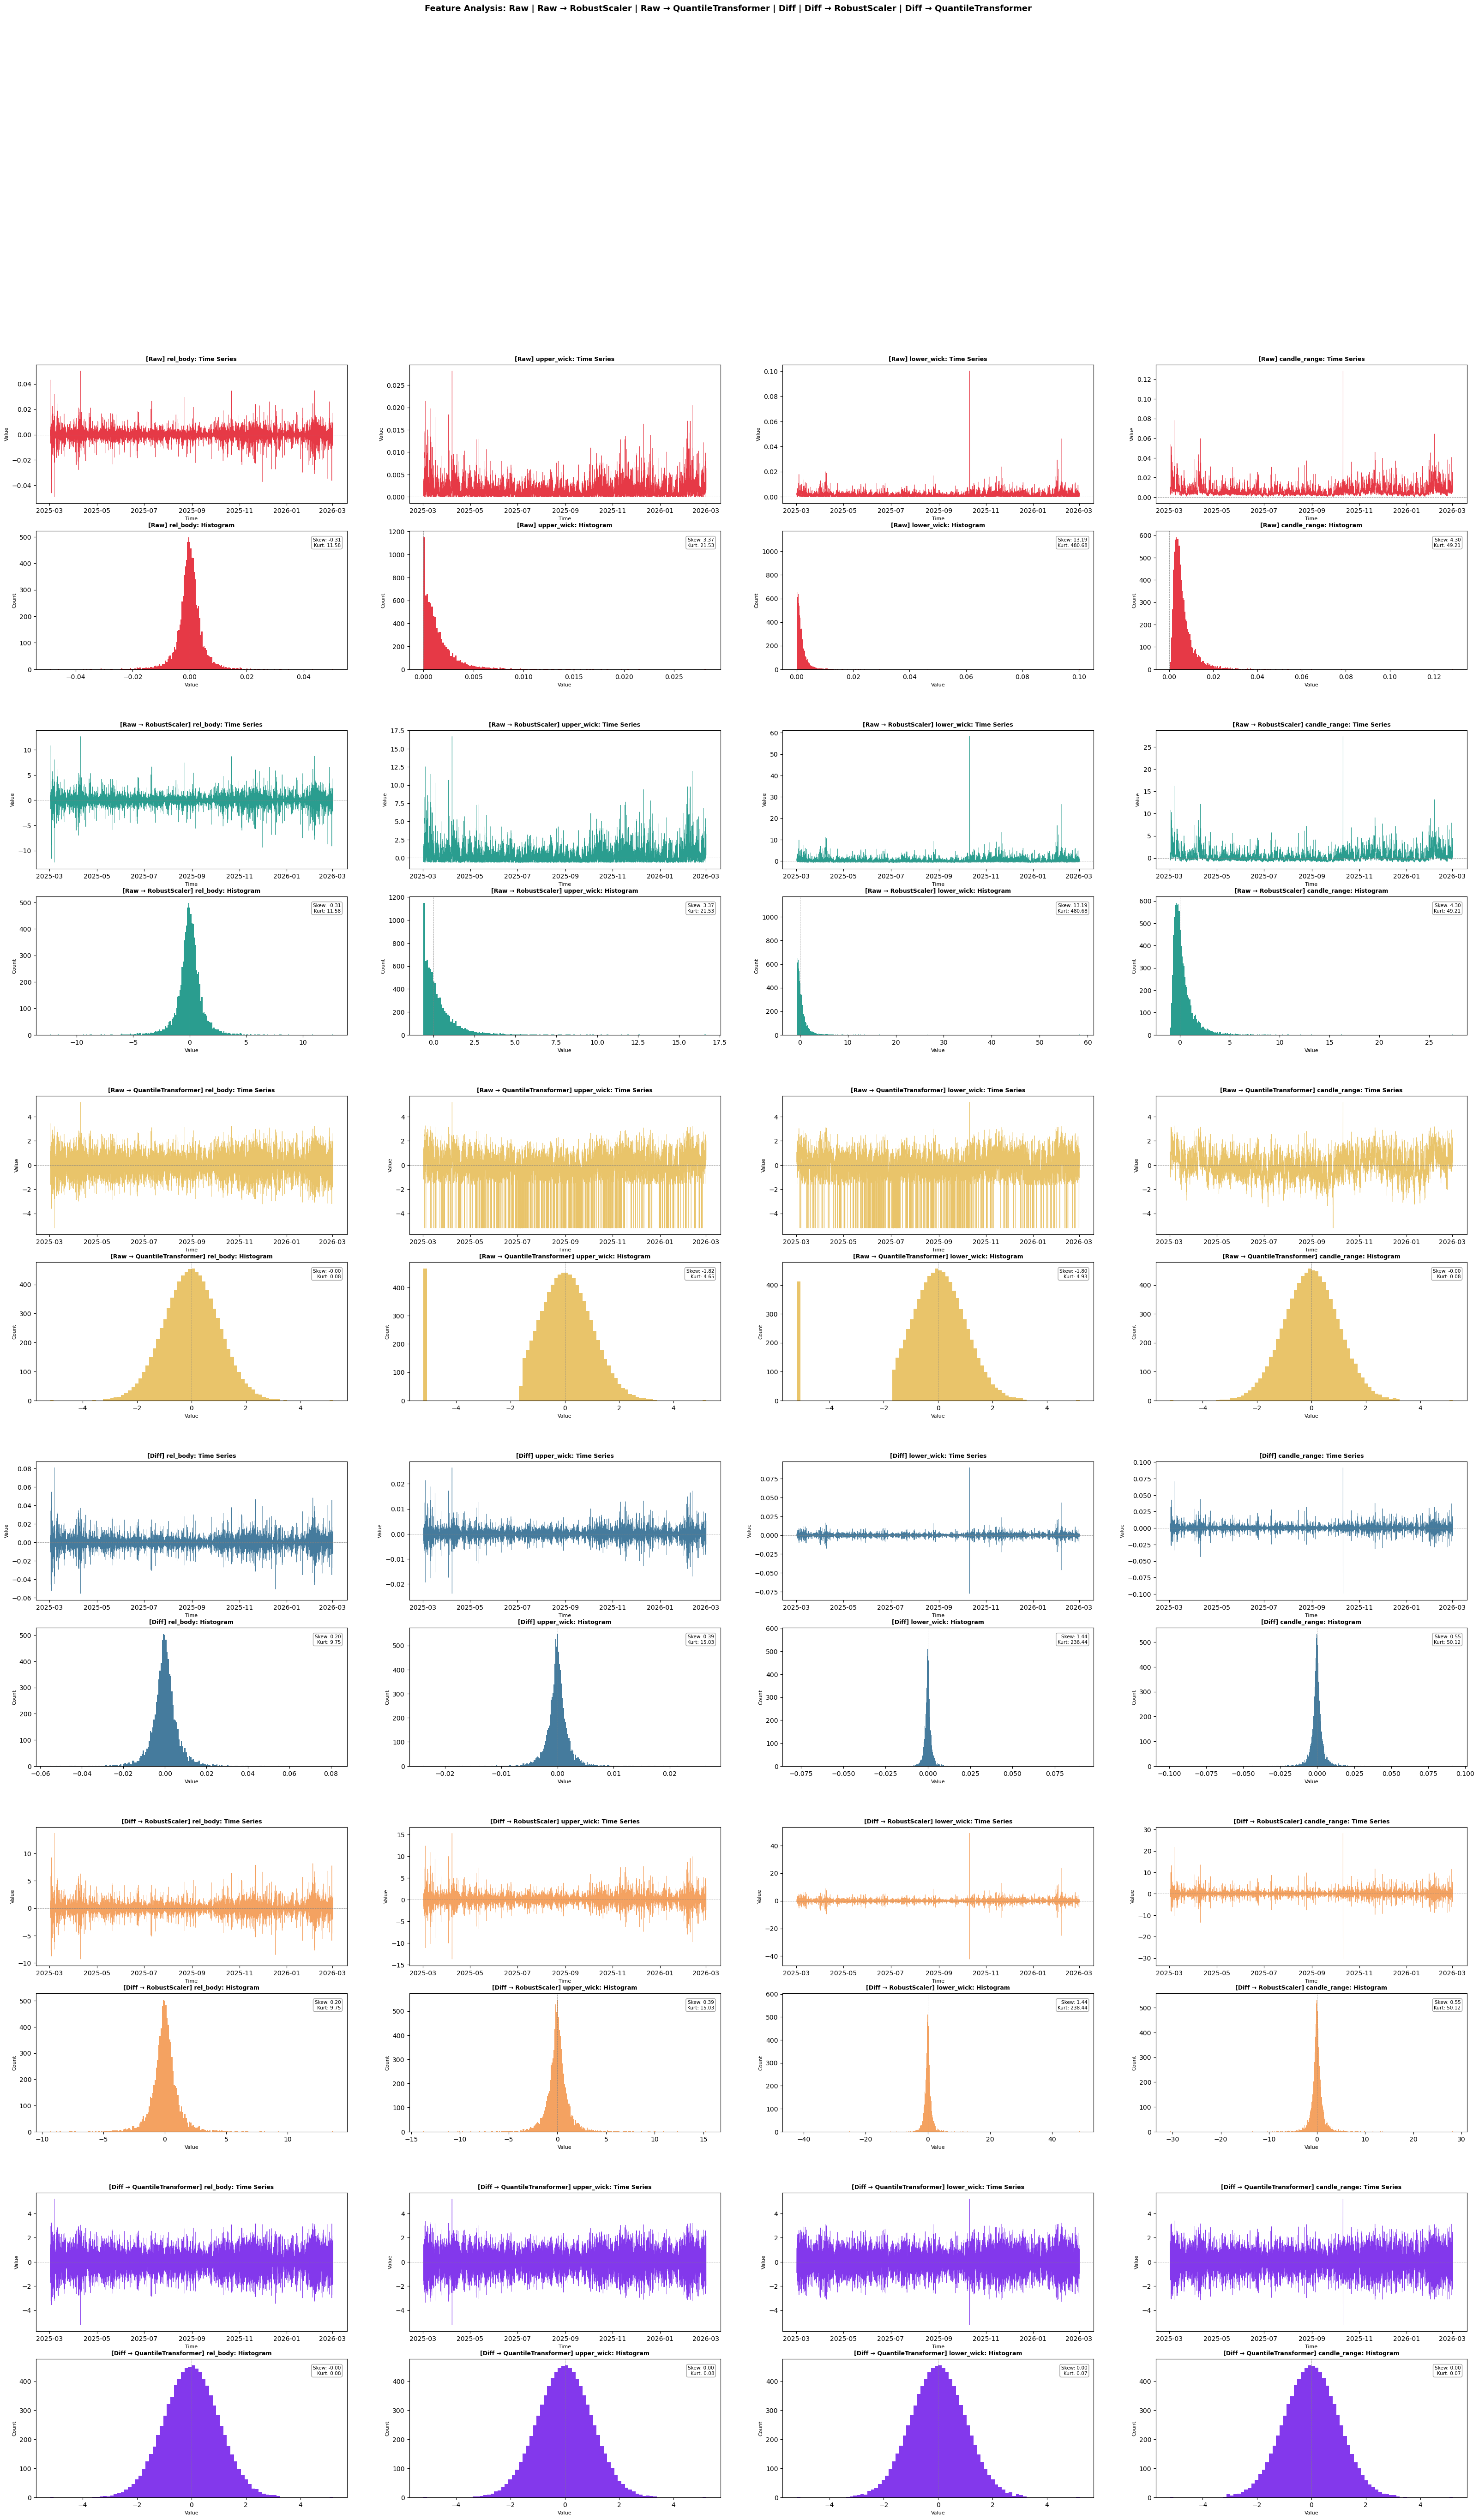

In [5]:
from helpers import plot_features
from framework.analysis.features.candles import CandleStructure

from sklearn.preprocessing import QuantileTransformer, RobustScaler

cs = CandleStructure()

cs_raw = cs.calculate(df)
cs_raw.dropna(inplace=True)

cs_raw_rob_norm = cs.with_scaler(RobustScaler).fit(cs_raw).normalize(cs_raw)
cs_raw_rob_norm.dropna(inplace=True)

cs_raw_quant_norm = cs.with_scaler(QuantileTransformer, output_distribution="normal").fit(cs_raw).normalize(cs_raw)
cs_raw_quant_norm.dropna(inplace=True)

cs_diff = cs_raw.diff()
cs_diff.dropna(inplace=True)

cs_diff_rob_norm = cs.with_scaler(RobustScaler).fit(cs_diff).normalize(cs_diff)
cs_diff_rob_norm.dropna(inplace=True)

cs_diff_quant_norm = cs.with_scaler(QuantileTransformer, output_distribution="normal").fit(cs_diff).normalize(cs_diff)
cs_diff_quant_norm.dropna(inplace=True)

plot_features([
    (cs_raw, "Raw"),
    (cs_raw_rob_norm, "Raw → RobustScaler"),
    (cs_raw_quant_norm, "Raw → QuantileTransformer"),
    (cs_diff, "Diff"),
    (cs_diff_rob_norm, "Diff → RobustScaler"),
    (cs_diff_quant_norm, "Diff → QuantileTransformer"),
])

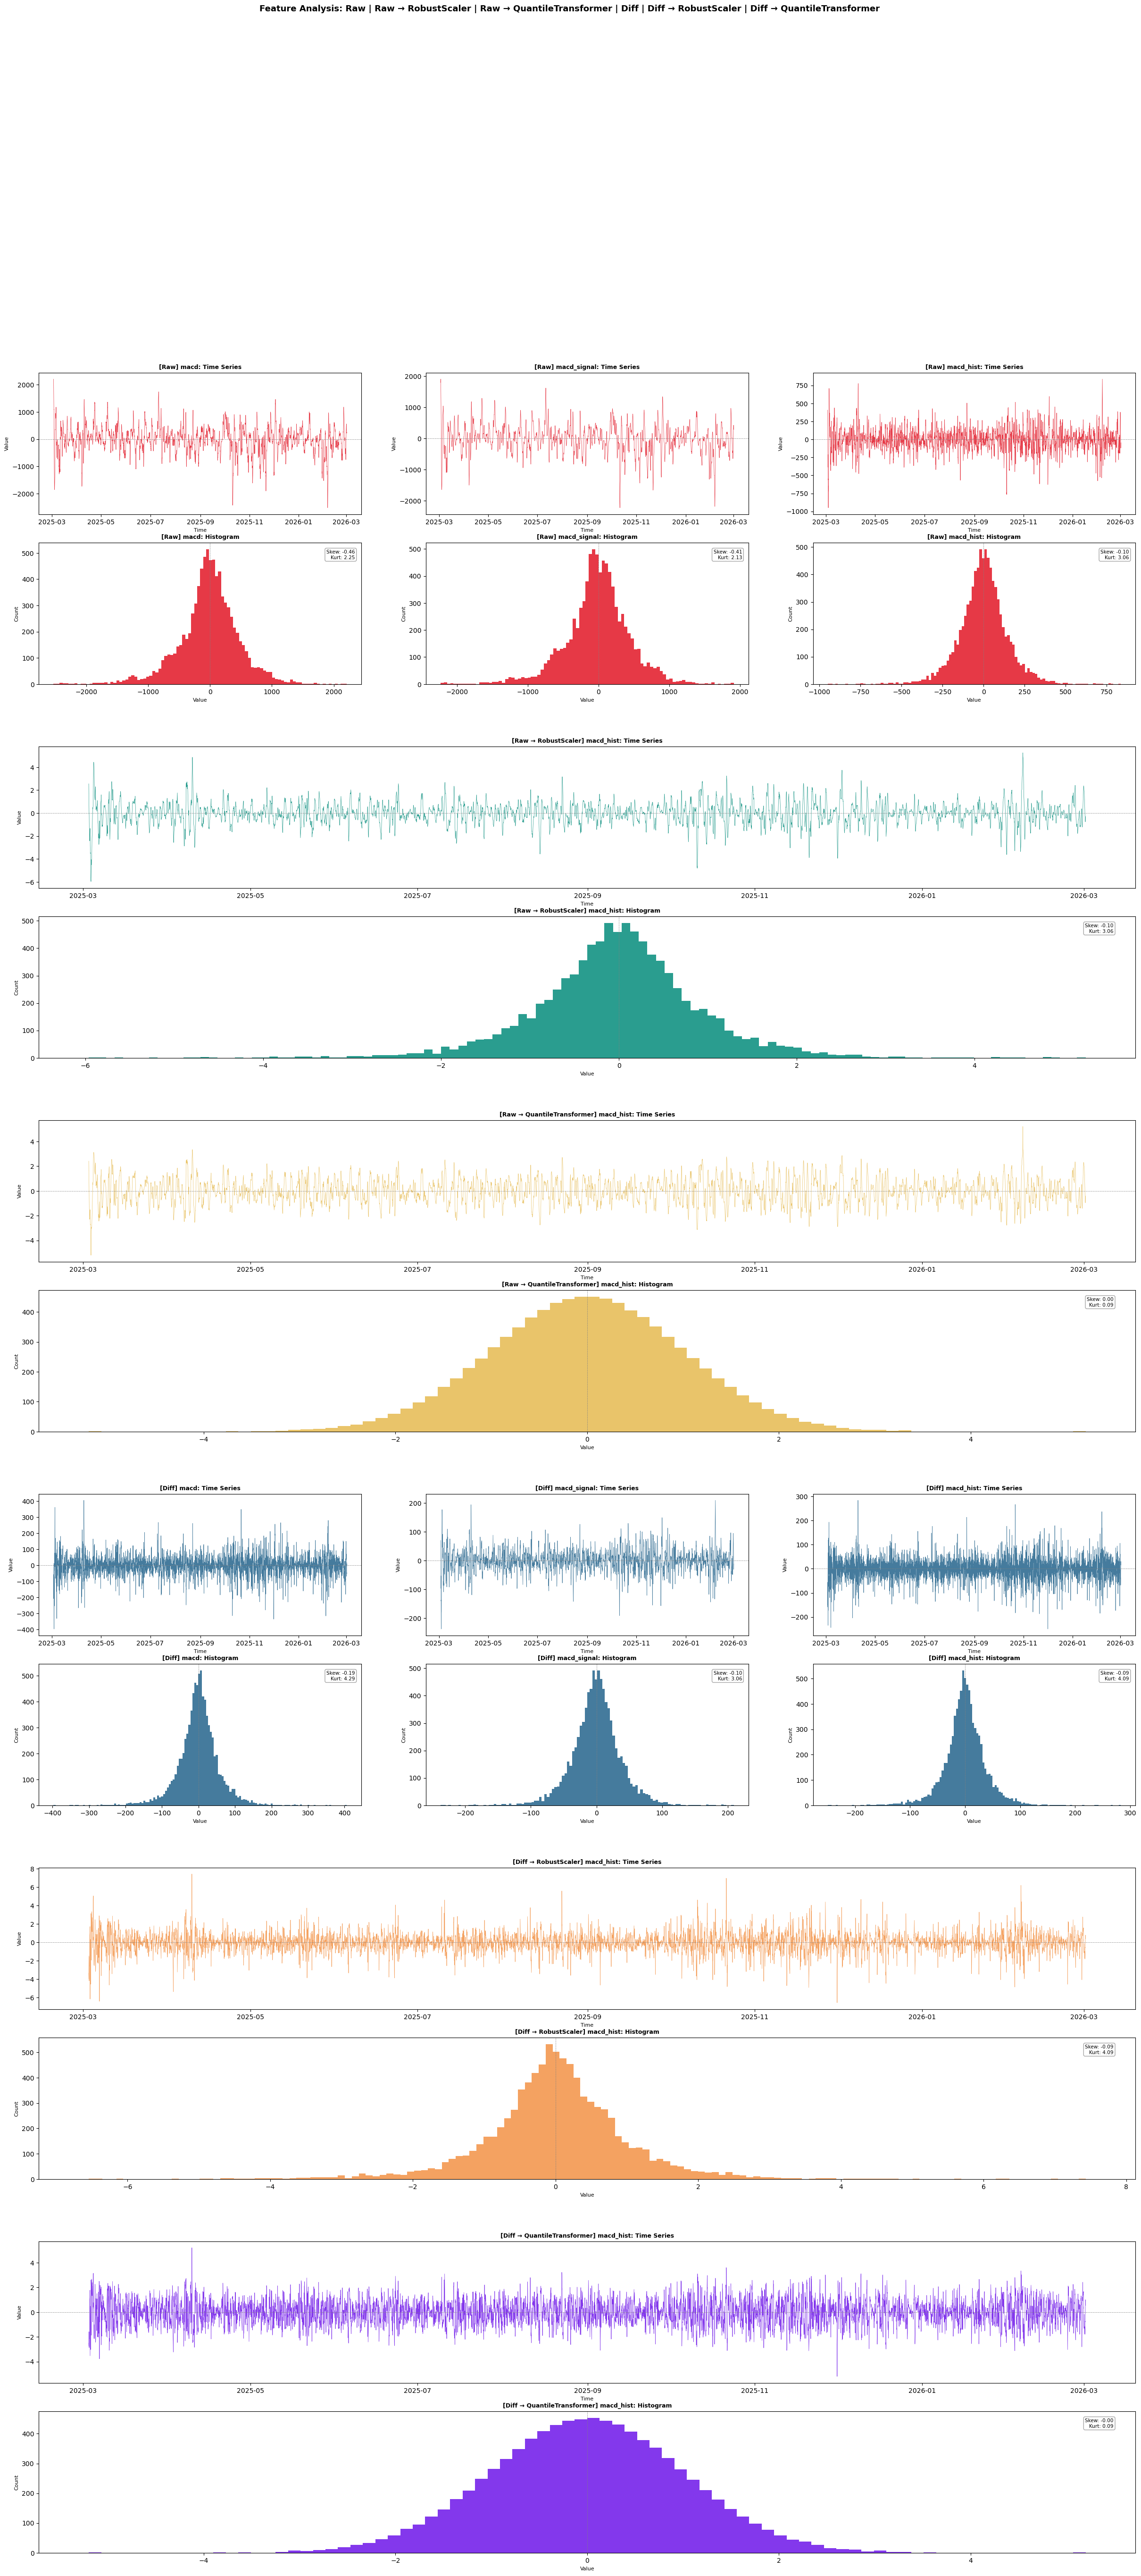

In [6]:
from framework.analysis.features.momentum import MovingAverageConvergenceDivergence

macd = MovingAverageConvergenceDivergence()

macd_raw = macd.calculate(df)
macd_raw.dropna(inplace=True)

macd_raw_rob_norm = macd.with_scaler(RobustScaler).fit(macd_raw).normalize(macd_raw)
macd_raw_rob_norm.dropna(inplace=True)

macd_raw_quant_norm = macd.with_scaler(QuantileTransformer, output_distribution="normal").fit(macd_raw).normalize(macd_raw)
macd_raw_quant_norm.dropna(inplace=True)

macd_diff = macd_raw.diff()
macd_diff.dropna(inplace=True)

macd_diff_rob_norm = macd.with_scaler(RobustScaler).fit(macd_diff).normalize(macd_diff)
macd_diff_rob_norm.dropna(inplace=True)

macd_diff_quant_norm = macd.with_scaler(QuantileTransformer, output_distribution="normal").fit(macd_diff).normalize(macd_diff)
macd_diff_quant_norm.dropna(inplace=True)

plot_features([
    (macd_raw, "Raw"),
    (macd_raw_rob_norm, "Raw → RobustScaler"),
    (macd_raw_quant_norm, "Raw → QuantileTransformer"),
    (macd_diff, "Diff"),
    (macd_diff_rob_norm, "Diff → RobustScaler"),
    (macd_diff_quant_norm, "Diff → QuantileTransformer"),
])

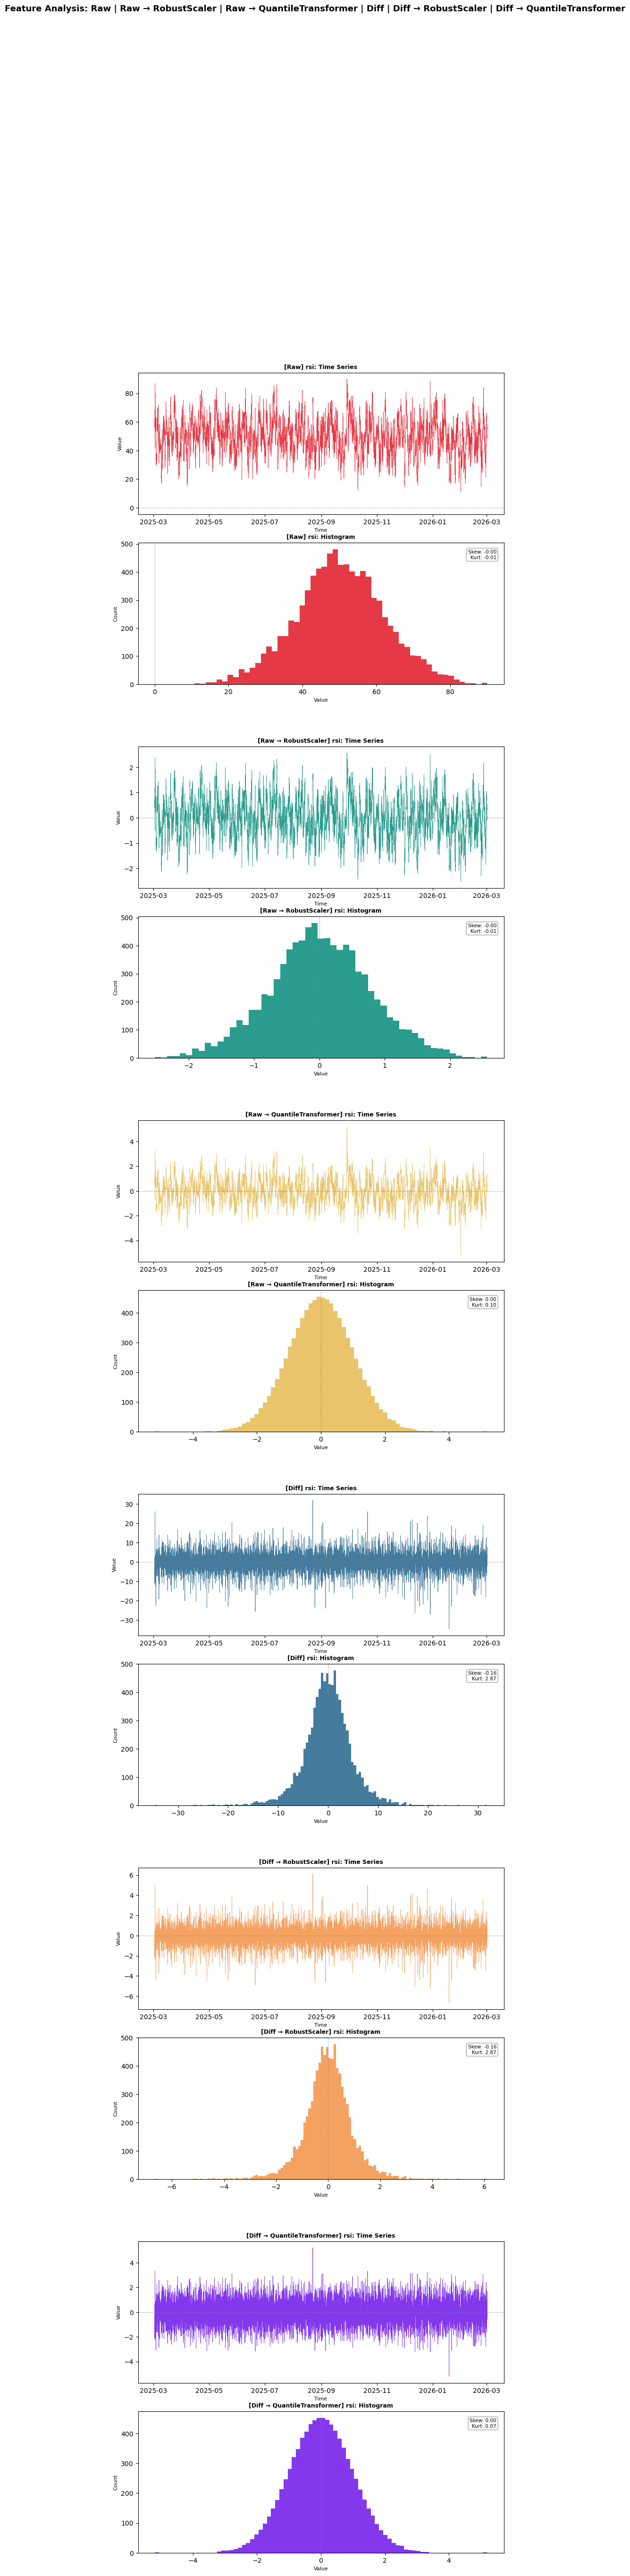

In [7]:
from framework.analysis.features.momentum import RelativeStrengthIndex
from sklearn.preprocessing import RobustScaler

rsi = RelativeStrengthIndex()

rsi_raw = rsi.calculate(df)
rsi_raw.dropna(inplace=True)

rsi_raw_rob_norm = rsi.with_scaler(RobustScaler).fit(rsi_raw).normalize(rsi_raw)
rsi_raw_rob_norm.dropna(inplace=True)

rsi_raw_quant_norm = rsi.with_scaler(QuantileTransformer, output_distribution="normal").fit(rsi_raw).normalize(rsi_raw)
rsi_raw_quant_norm.dropna(inplace=True)

rsi_diff = rsi_raw.diff()
rsi_diff.dropna(inplace=True)

rsi_diff_rob_norm = rsi.with_scaler(RobustScaler).fit(rsi_diff).normalize(rsi_diff)
rsi_diff_rob_norm.dropna(inplace=True)

rsi_diff_quant_norm = rsi.with_scaler(QuantileTransformer, output_distribution="normal").fit(rsi_diff).normalize(rsi_diff)
rsi_diff_quant_norm.dropna(inplace=True)

plot_features([
    (rsi_raw, "Raw"),
    (rsi_raw_rob_norm, "Raw → RobustScaler"),
    (rsi_raw_quant_norm, "Raw → QuantileTransformer"),
    (rsi_diff, "Diff"),
    (rsi_diff_rob_norm, "Diff → RobustScaler"),
    (rsi_diff_quant_norm, "Diff → QuantileTransformer"),
])

In [ ]:
from sklearn.model_selection import train_test_split

# First split: 70% Train, 30% Temp (Val + Test)
train_df, temp_df = train_test_split(df, test_size=0.3, shuffle=False)

# Second split: Split the 30% Temp into 50% Val (15% total) and 50% Test (15% total)
val_df, test_df = train_test_split(temp_df, test_size=0.5, shuffle=False)

# Reset indices to ensure environment works correctly
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [ ]:
from framework.analysis.feature_engineer import FeatureEngineer

feature_engineer = FeatureEngineer()
feature_engineer.fit_scalers(train_df)

train_df = feature_engineer.normalize(train_df)
val_df = feature_engineer.normalize(val_df)
test_df = feature_engineer.normalize(test_df)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

plot_df = pd.concat([train_df, val_df, test_df], axis=0)

# Use 4 columns for a balanced 8x4 Grid
cols = 4
rows = math.ceil(len(plot_df.columns) / cols)

plt.figure(figsize=(20, 5 * rows))  # Adjust figsize for clarity
sns.set_style("whitegrid")

for i, column in enumerate(plot_df.columns):
    plt.subplot(rows, cols, i + 1)

    # Plot histogram with KDE
    sns.histplot(plot_df[column], kde=True, bins=50, color="royalblue", edgecolor="black", linewidth=0.5)

    plt.title(f"Distribution: {column}", fontsize=12, fontweight="bold")
    plt.xlabel("Normalized Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
features = [col for col in train_df.columns if col not in ["open", "high", "low", "close", "volume", "atr"]]

len(features), features

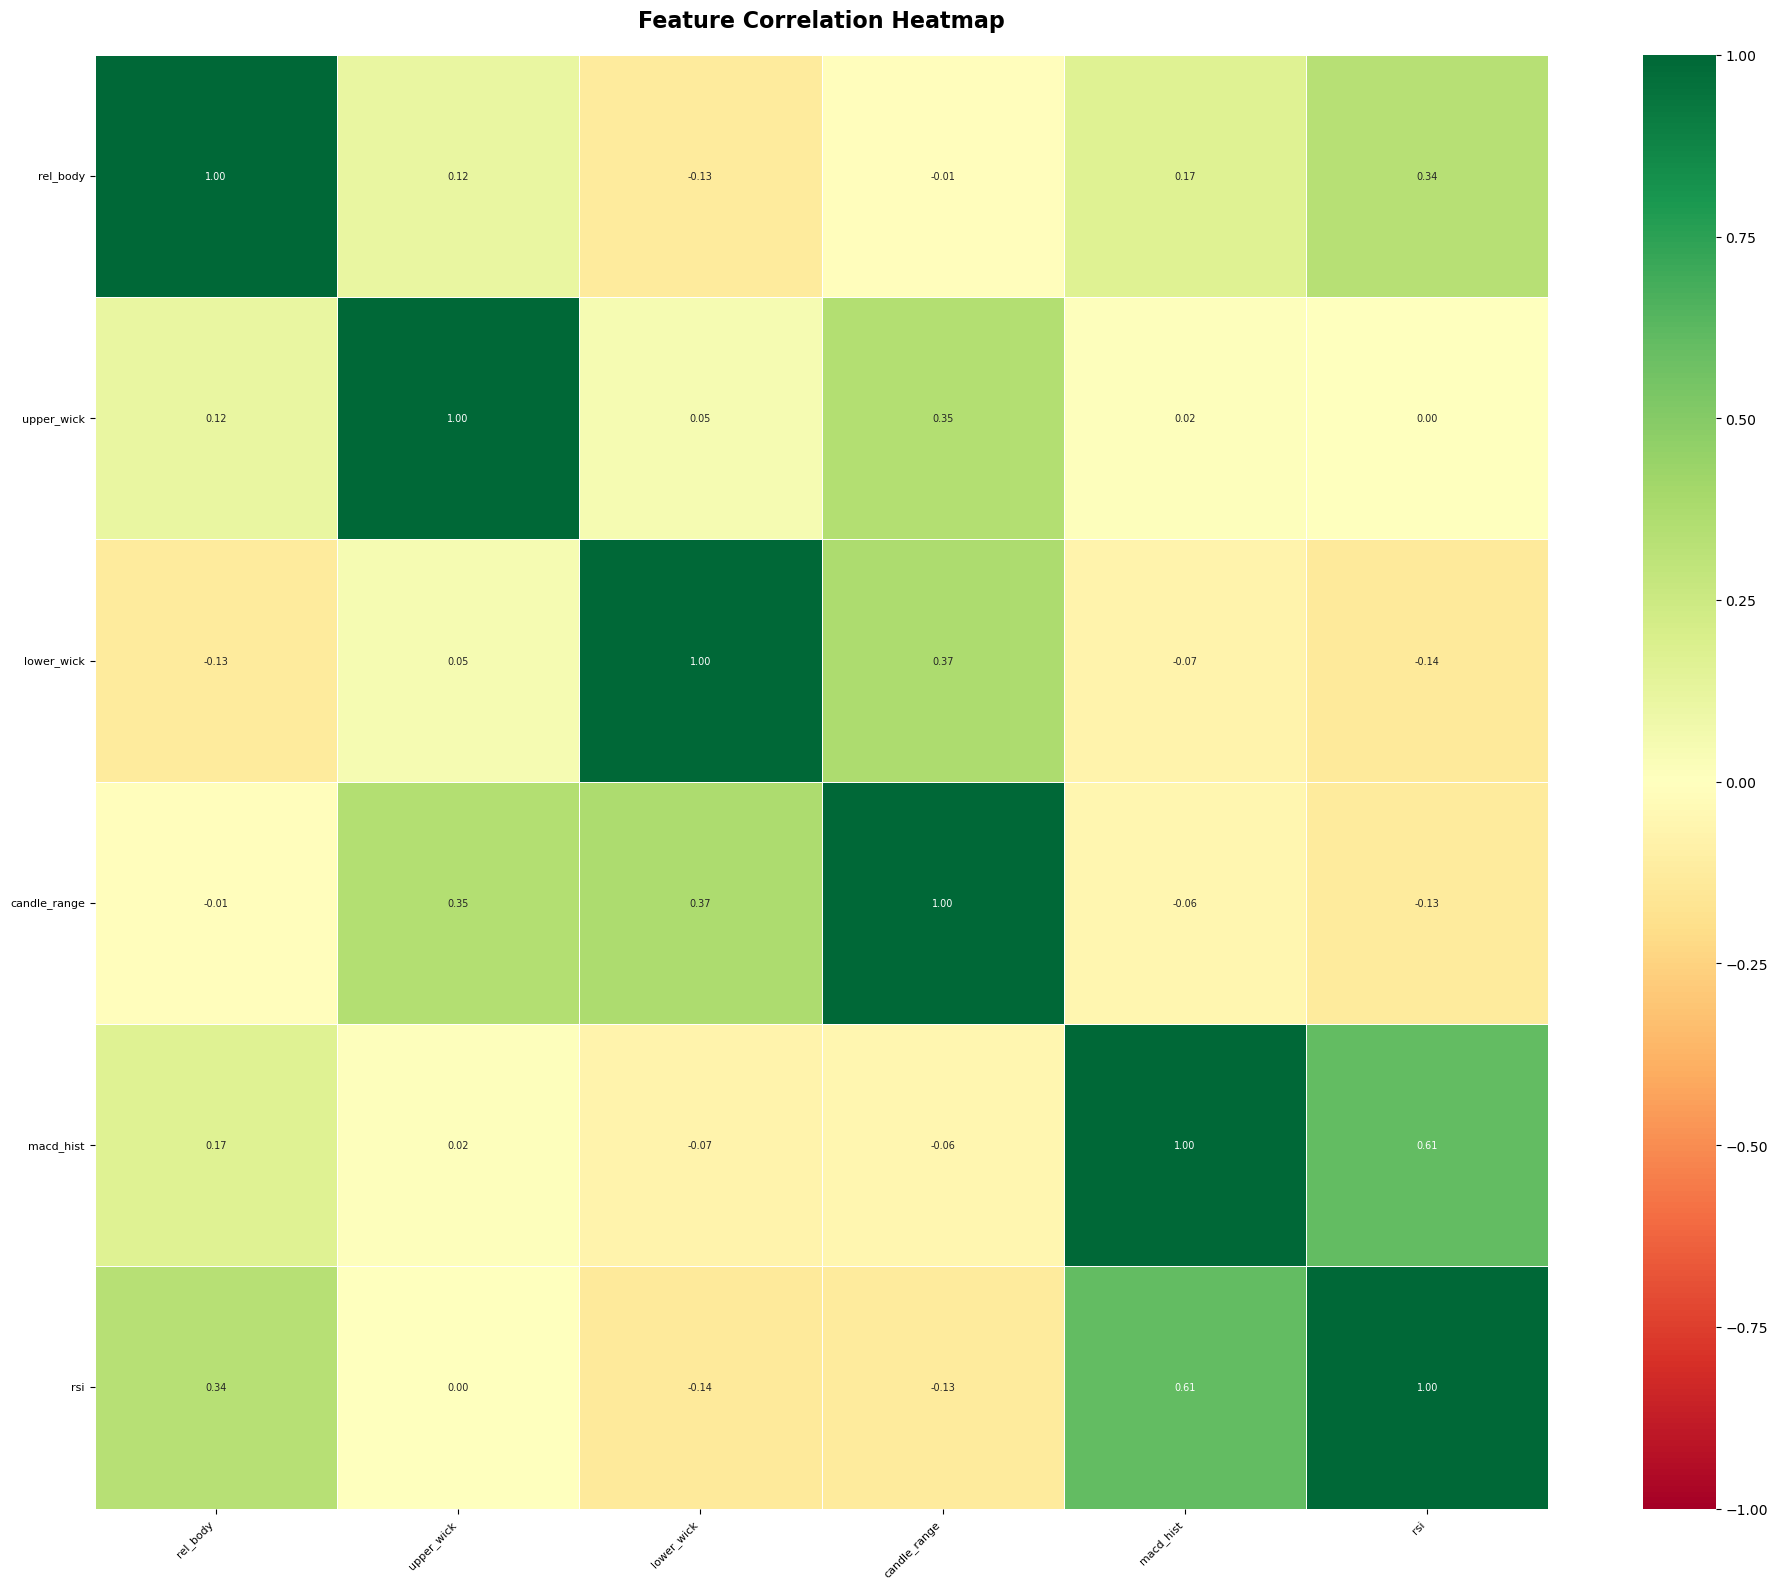

Found 1 highly correlated pairs (|corr| > 0.5):


,Feature A,Feature B,Correlation
0,macd_hist,rsi,0.605017


In [ ]:
# Compute correlation matrix on feature columns only
import seaborn as sns

plot_df = pd.concat([cs_raw_quant_norm, macd_raw_quant_norm, rsi_raw_rob_norm], axis=1)
# plot_df = pd.concat([cs_diff_quant_norm, macd_diff_quant_norm], axis=1)

corr_matrix = plot_df.corr(method="pearson")

fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(
    corr_matrix,
    ax=ax,
    annot=True,           # Show numbers in each cell
    fmt=".2f",            # 2 decimal places
    cmap="RdYlGn",        # Red = negative, Yellow = neutral, Green = positive
    center=0,             # Anchor color scale at 0
    vmin=-1, vmax=1,
    linewidths=0.5,
    annot_kws={"size": 7},
    square=True,
)
ax.set_title("Feature Correlation Heatmap", fontsize=16, fontweight="bold", pad=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

# Extract pairs with |correlation| > threshold (excluding self-correlation)
THRESHOLD = 0.5

high_corr_pairs = (
    corr_matrix
    .where(lambda df: (df.abs() > THRESHOLD) & (df != 1.0))
    .stack()
    .reset_index()
    .rename(columns={"level_0": "Feature A", "level_1": "Feature B", 0: "Correlation"})
    .drop_duplicates(subset=["Correlation"])   # Remove duplicates (A-B and B-A)
    .sort_values("Correlation", key=abs, ascending=False)
)

print(f"Found {len(high_corr_pairs)} correlated pairs (|corr| > {THRESHOLD}):")
high_corr_pairs

In [ ]:
from framework.ai.training.train_agent import ModelTrainer

model_trainer = ModelTrainer(features)

In [ ]:
model_trainer.train(train_df)

In [ ]:
model_trainer.evaluate(val_df, "Validation")

In [ ]:
model_trainer.evaluate(test_df, "Test")